In [1]:
import sys
sys.path.insert(0,'C:\\code\\masters_thesis\\')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update({'font.size': 12,
                     'xtick.labelsize' : 12,
                     'ytick.labelsize' : 12})
import matplotlib.ticker as ticker
import array_to_latex as a2l

"""
Own packages
"""

from codelib.population_parameters import corr_to_cov_matrix, project_logreturns_dist_params, calculate_mu_linear_returns, calculate_cov_mat_linear_returns, cov_to_corr_and_vols, cov_to_corr_matrix, calculate_mu_and_vols_pc, eig_decomp
from codelib.portfolio_measures import portfolio_mean, portfolio_variance, portfolio_std, calculate_pc_var_contributions
from codelib.portfolio_performance_measures import sharpe_ratio, calculate_sharpe_ratio
from codelib.portfolio_optimizers import calculate_max_sharpe_portfolio, calculate_min_var_portfolio, tangency_portfolio, minimum_variance_portfolio

# Calculate true distributionparameters

In [2]:
corr_mat_yearly = np.array([[1.0,0.6,0.1,0.3,-0.1,-0.1,-0.2,-0.1,-0.1,-0.1],
[0.6,1.0,0.6,0.6,0.2,0.2,0.2,0.1,0.1,0.3],
[0.1,0.6,1.0,0.7,0.7,0.6,0.6,0.4,0.3,0.7],
[0.3,0.6,0.7,1.0,0.5,0.6,0.4,0.2,0.2,0.5],
[-0.1,0.2,0.7,0.5,1.0,0.7,0.8,0.4,0.4,0.8],
[-0.1,0.2,0.6,0.6,0.7,1.0,0.7,0.4,0.4,0.7],
[-0.2,0.2,0.6,0.4,0.8,0.7,1.0,0.4,0.4,0.7],
[-0.1,0.1,0.4,0.2,0.4,0.4,0.4,1.0,0.3,0.4],
[-0.1,0.1,0.3,0.2,0.4,0.4,0.4,0.3,1.0,0.4],
[-0.1,0.3,0.7,0.5,0.8,0.7,0.7,0.4,0.4,1.0]])
vols_yearly = np.array([0.037, 0.055, 0.119, 0.107, 0.153, 0.217, 0.204, 0.14, 0.108, 0.094])
returns_yearly = np.array([0.019, 0.022, 0.049, 0.043, 0.061, 0.083, 0.102, 0.056, 0.041, 0.038])
assets = ["GB","IGB","HYB","EMGB","EDM","EEM","PE","IS","RE","HF"]
assets_long = ["1 Stats- og realkreditobligationer", "2 Investment grade obligationer", "3 High-yield obligationer", "4 Emerging markets statsobligationer", "5 Globale aktier (developed markets)", "6 Emerging markets aktier", "7 Private equity", "8 Infrastruktur", "9 Ejendomme", "10 Hedgefonde"]
num_assets = len(returns_yearly)
rf = 0

cov_mat_logreturns_yearly = corr_to_cov_matrix(corr_mat_yearly, vols_yearly)
mu_logreturns_yearly = returns_yearly.T - 1/2 * np.diag(cov_mat_logreturns_yearly)

In [3]:
# print to latex
#a2l.to_ltx(pd.DataFrame(np.vstack((returns_yearly*100,vols_yearly*100, np.tril(corr_mat_yearly))).T, index=assets_long),frmt='{:6.1f}', arraytype='bmatrix', print_out=True)

In [4]:
# calculate monthly linear-return parameters
mu_logreturns_monthly, cov_mat_logreturns_monthly = project_logreturns_dist_params(mu_logreturns_yearly, cov_mat_logreturns_yearly, 12, 1)
mu = calculate_mu_linear_returns(mu_logreturns_monthly, cov_mat_logreturns_monthly)
cov_mat = calculate_cov_mat_linear_returns(mu_logreturns_monthly, cov_mat_logreturns_monthly)
corr_mat, vols_mat = cov_to_corr_and_vols(cov_mat)

In [5]:
#print to latex
#a2l.to_ltx(pd.DataFrame(assets).T, arraytype = 'bmatrix', print_out=True)
#a2l.to_ltx(pd.DataFrame(np.vstack((mu*100,np.diag(vols_mat)*100, np.tril(corr_mat).T))),frmt='{:6.1f}', arraytype='bmatrix', print_out=True)

# Calculate true optimal portfolios

In [6]:
# calculate true optimal long-only portfolio
w_opt = calculate_max_sharpe_portfolio(mu, cov_mat, rf)
a2l.to_ltx(w_opt,frmt='{:6.3f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
   0.757 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.097 &   0.068 &   0.077 &   0.000
\end{bmatrix}


In [7]:
# calculate true optimal long-short portfolio
w_opt_ls = tangency_portfolio(cov_mat, mu, rf)
a2l.to_ltx(w_opt_ls,frmt='{:6.3f}', arraytype = 'bmatrix', print_out=True)

\begin{bmatrix}
   0.962 & -0.288 &   0.039 &   0.034 & -0.106 & -0.025 &   0.147 &   0.068 &   0.084 &   0.085
\end{bmatrix}


In [8]:
# calculate true expected return, std, and Sharpe-ratio for the true optimal portfolio long-only portfolio

mu_opt = portfolio_mean(w_opt, mu)
print("mu_opt = " + str(mu_opt))
var_opt = portfolio_variance(w_opt, cov_mat)
print("sigma^2_opt = " + str(var_opt))
std_opt = portfolio_std(w_opt, cov_mat)
print("sigma_opt = " + str(std_opt))
sr_opt = calculate_sharpe_ratio(w_opt, mu, cov_mat)
print("SR_opt = " + str(sr_opt))

mu_opt = 0.0026133318775114793
sigma^2_opt = 0.0001134254486079654
sigma_opt = 0.010650138431399161
SR_opt = 0.24538008537116762


In [9]:
# calculate true expected return, std, and Sharpe-ratio for the true optimal portfolio long-short portfolio

mu_opt_ls = portfolio_mean(w_opt_ls, mu)
print("mu_opt_ls = " + str(mu_opt_ls))
var_opt_ls = portfolio_variance(w_opt_ls, cov_mat)
print("sigma^2_opt_ls = " + str(var_opt_ls))
std_opt_ls = portfolio_std(w_opt_ls, cov_mat)
print("sigma_opt_ls = " + str(std_opt_ls))
sr_opt_ls = calculate_sharpe_ratio(w_opt_ls, mu, cov_mat)
print("SR_opt_ls = " + str(sr_opt_ls))

mu_opt_ls = 0.002695082330619379
sigma^2_opt_ls = 0.00011089879171017822
sigma_opt_ls = 0.010530849524619475
SR_opt_ls = 0.255922594309101


# Simulations for T=60

In [10]:
# simulate log-returns and calculate simulated optimal portfolios (long-short og long-only)

num_sim = 10000
num_obs = 60 # months (25 years of monthly observations)
np.random.seed(99)

# simulate multivariate normal distributed log-returns:
sim_log_returns = np.random.multivariate_normal(mu_logreturns_monthly, cov_mat_logreturns_monthly, size=(num_sim, num_obs))
sim_returns = np.exp(sim_log_returns) - 1

# remove sim return parameters where min_var return < 0:
mu_est = []
cov_mat_est = []
#vec_ones = np.ones(num_assets)
min_var_sim_ls = []

for k in range(num_sim):
    mu_sim_est = np.mean(sim_returns[k], axis=0)
    cov_mat_sim_est = np.cov(sim_returns[k], rowvar=False)
    min_var_ls = minimum_variance_portfolio(cov_mat_sim_est)
    min_var_ret = min_var_ls @ mu_sim_est
    #min_var_ret = (np.linalg.inv(cov_mat_sim_est) @ vec_ones / (vec_ones @ np.linalg.inv(cov_mat_sim_est) @ vec_ones)) @ mu_sim_est
    if min_var_ret > 0.0001:
        mu_est.append(mu_sim_est)
        cov_mat_est.append(cov_mat_sim_est)
        min_var_sim_ls.append(min_var_ls)

min_var_sim_ls = np.array(min_var_sim_ls)
mu_est = np.array(mu_est)
cov_mat_est = np.array(cov_mat_est)

# calculate optimal weights

eff_num_sim = len(mu_est)
w_sim = np.zeros((eff_num_sim, num_assets))
w_sim_ls = np.zeros((eff_num_sim, num_assets))

for k in range(eff_num_sim):

    w_sim[k,:] = calculate_max_sharpe_portfolio(mu_est[k],cov_mat_est[k],rf)
    w_sim_ls[k,:] = tangency_portfolio(cov_mat_est[k], mu_est[k], rf)

In [11]:
# calculate ACTUAL expected values for the simulated portfolios
mu_sim = np.apply_along_axis(portfolio_mean, 1, w_sim, mu)
std_sim = np.apply_along_axis(portfolio_std, 1, w_sim, cov_mat)
sr_sim = sharpe_ratio(mu_sim, std_sim**2)
mu_sim_ls = np.apply_along_axis(portfolio_mean, 1, w_sim_ls, mu)
std_sim_ls = np.apply_along_axis(portfolio_std, 1, w_sim_ls, cov_mat)
sr_sim_ls = sharpe_ratio(mu_sim_ls, std_sim_ls**2)

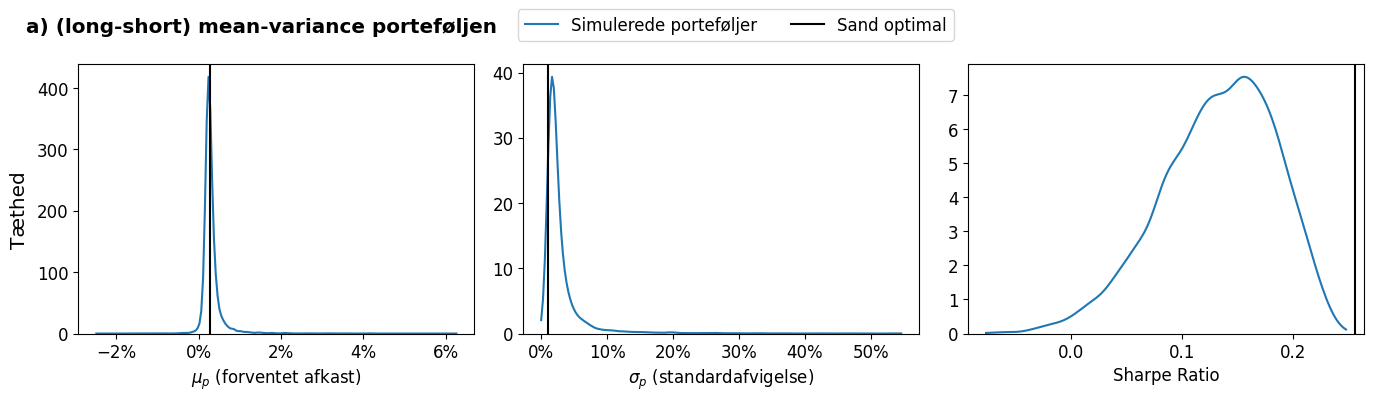

In [12]:
# plot distributions of actual values for simulated portfolios (long-short)

fig, ax = plt.subplots(1,3,figsize=(14,4))
fig.suptitle('a) (long-short) mean-variance porteføljen', x=0.2, fontweight="bold")

# expected return
sns.kdeplot(mu_sim_ls, label="Simulerede porteføljer", ax=ax[0])
ax[0].axvline(mu_opt_ls, ymin=0, color="black", label='Sand optimal')

# std.
sns.kdeplot(std_sim_ls, clip=(0,np.max(std_sim_ls)), label="Simulerede Porteføljer", ax=ax[1])
ax[1].axvline(std_opt_ls, ymin=0, color="black", label='Sand optimal')

# Sharpe Ratio
sns.kdeplot(sr_sim_ls,clip=(np.min(sr_sim_ls),np.max(sr_sim_ls)), label="Simulerede porteføljer", ax=ax[2])
ax[2].axvline(sr_opt_ls, ymin=0, color="black", label='Sand optimal')

ticks = ticker.PercentFormatter(1)

ax[0].xaxis.set_major_formatter(ticks)
ax[1].xaxis.set_major_formatter(ticks)
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
fig.supylabel('Tæthed')
ax[0].set_xlabel("$\mu_p$ (forventet afkast)")
ax[1].set_xlabel("$\sigma_p$ (standardafvigelse)")
ax[2].set_xlabel("Sharpe Ratio")

lines_labels = [ax.get_legend_handles_labels() for ax in [ax[0]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, ncol=10, bbox_to_anchor=(0.7, 1.02))

plt.tight_layout()
#plt.savefig("simulated_kdplots_long_short.jpg",bbox_inches="tight",dpi=300)
plt.show()

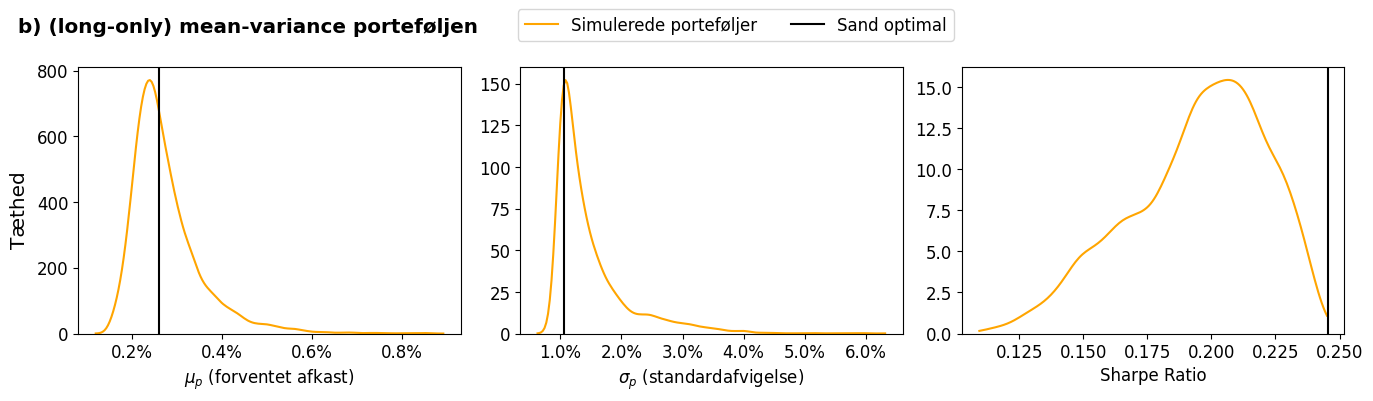

In [13]:
# plot distributions of actual values for simulated portfolios (long-only)

fig, ax = plt.subplots(1,3,figsize=(14,4))
fig.suptitle('b) (long-only) mean-variance porteføljen', x=0.19, fontweight="bold")

# expected return
sns.kdeplot(mu_sim, label="Simulerede porteføljer", ax=ax[0], color='orange')
ax[0].axvline(mu_opt, ymin=0, color="black", label='Sand optimal')

# std.
sns.kdeplot(std_sim, clip=(0,np.max(std_sim)), label="Simulerede Porteføljer", ax=ax[1], color='orange')
ax[1].axvline(std_opt, ymin=0, color="black", label='Sand optimal')

# Sharpe Ratio
sns.kdeplot(sr_sim,clip=(np.min(sr_sim),np.max(sr_sim)), label="Simulerede porteføljer", ax=ax[2], color='orange')
ax[2].axvline(sr_opt, ymin=0, color="black", label='Sand optimal')

ticks = ticker.PercentFormatter(1)

ax[0].xaxis.set_major_formatter(ticks)
ax[1].xaxis.set_major_formatter(ticks)
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
fig.supylabel('Tæthed')
ax[0].set_xlabel("$\mu_p$ (forventet afkast)")
ax[1].set_xlabel("$\sigma_p$ (standardafvigelse)")
ax[2].set_xlabel("Sharpe Ratio")

lines_labels = [ax.get_legend_handles_labels() for ax in [ax[0]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, ncol=10, bbox_to_anchor=(0.7, 1.02))

plt.tight_layout()
#plt.savefig("simulated_kdplots_long_only.jpg",bbox_inches="tight",dpi=300)
plt.show()

# Average expected return, std. and SR for simulated portfolios

In [14]:
# for T=60
# calculate average of actual return, std., variance and SR for simulated portfolios
print("av. simulated portfolios T=60 (long-short) \n")
av_mu_sim_ls = np.mean(mu_sim_ls)
print(av_mu_sim_ls)
av_std_sim_ls = np.mean(std_sim_ls)
print(av_std_sim_ls)
av_sr_sim_ls = np.mean(sr_sim_ls)
print(av_sr_sim_ls)

print("\n av. simulated portfolios T=60 (long-only) \n")
av_mu_sim = np.mean(mu_sim)
print(av_mu_sim)
av_std_sim = np.mean(std_sim)
print(av_std_sim)
av_sr_sim = np.mean(sr_sim)
print(av_sr_sim)

av. simulated portfolios T=60 (long-short) 

0.003067570427329068
0.02974884295066807
0.13231511930992085

 av. simulated portfolios T=60 (long-only) 

0.00277182305110358
0.014829513523782763
0.19464708188178584


# Simulations for T = 120, 180

In [15]:
# simulate returns for (num_obs) t= 120, 180 months
# find optimal portfolio weights for each simulation

num_sim = 10000
num_obs = 180 # months
T = [120,180]
np.random.seed(99)
sim_log_returns = np.random.multivariate_normal(mu_logreturns_monthly, cov_mat_logreturns_monthly, size=(num_sim, num_obs))
sim_returns = np.exp(sim_log_returns) - 1

vec_ones = np.ones(num_assets)

for t in T:
    mu_est_t = []
    cov_mat_est_t = []

    for k in range(num_sim):
        mu_sim_est = np.mean(sim_returns[k,:t], axis=0)
        cov_mat_sim_est = np.cov(sim_returns[k,:t], rowvar=False)
        min_var_ret = (np.linalg.inv(cov_mat_sim_est) @ vec_ones / (vec_ones @ np.linalg.inv(cov_mat_sim_est) @ vec_ones)) @ mu_sim_est
        if min_var_ret > 0.0001:
            mu_est_t.append(mu_sim_est)
            cov_mat_est_t.append(cov_mat_sim_est)

    mu_est_t = np.array(mu_est_t)
    cov_mat_est_t = np.array(cov_mat_est_t)

    # calculate optimal weights and portfolio parameters

    eff_num_sim = len(mu_est_t)
    print("effective number of simulations: " + str(eff_num_sim))
    w_sim_t = np.zeros((eff_num_sim, num_assets))
    w_sim_ls_t = np.zeros((eff_num_sim, num_assets))

    for k in range(eff_num_sim):

        w_sim_t[k,:] = calculate_max_sharpe_portfolio(mu_est_t[k],cov_mat_est_t[k],rf)
        w_sim_ls_t[k,:] = tangency_portfolio(cov_mat_est_t[k], mu_est_t[k], rf)

    # calculate true values for simulated portfolios
    mu_sim_t = np.apply_along_axis(portfolio_mean, 1, w_sim_t, mu)
    std_sim_t = np.apply_along_axis(portfolio_std, 1, w_sim_t, cov_mat)
    sr_sim_t = sharpe_ratio(mu_sim_t, std_sim_t**2)
    mu_sim_ls_t = np.apply_along_axis(portfolio_mean, 1, w_sim_ls_t, mu)
    std_sim_ls_t = np.apply_along_axis(portfolio_std, 1, w_sim_ls_t, cov_mat)
    sr_sim_ls_t = sharpe_ratio(mu_sim_ls_t, std_sim_ls_t**2)

    # calculate average
    print("\n ls: " + str(t) + ":\n")
    print(np.mean(mu_sim_ls_t))
    print(np.mean(std_sim_ls_t))
    print(np.mean(sr_sim_ls_t))

    print("\n long-only: " + str(t) + ":\n")
    print(np.mean(mu_sim_t))
    print(np.mean(std_sim_t))
    print(np.mean(sr_sim_t))

effective number of simulations: 9823

 ls: 120:

0.0029556183534241976
0.020292171720312124
0.1653040472549693

 long-only: 120:

0.002720043620787324
0.013617089385267926
0.2053419893526061
effective number of simulations: 9948

 ls: 180:

0.002854021797838955
0.01639635234709649
0.18515852644599184

 long-only: 180:

0.0026808656677922943
0.012832213907570732
0.21286866593888873


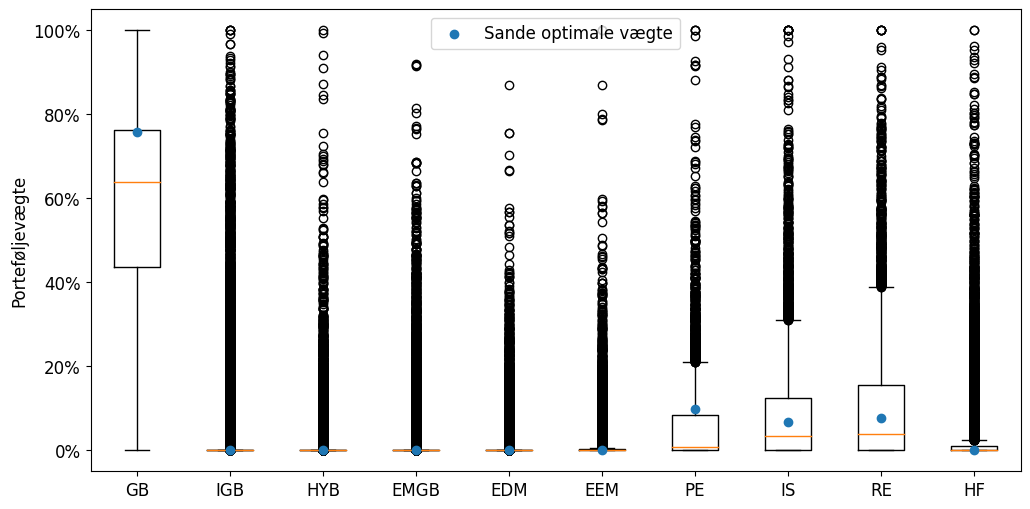

In [16]:
# boxplot of simulated optimal portfolio weights (long-short t=60)

fig, ax = plt.subplots(figsize=(12, 6))

ax.boxplot(w_sim)
ax.scatter(np.arange(1, len(w_opt) + 1), w_opt, label="Sande optimale vægte", zorder=10)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.set_xticklabels(assets)
ax.set_ylabel("Porteføljevægte")
ax.legend()
#plt.savefig("boxplot_optimal_weights.jpg",bbox_inches="tight",dpi=300)
plt.show()

# Simulate realized returns for true optimal (long-only) portfolio over the next 5 years

In [17]:
# calculate REALIZED portfolio parameters for optimal portfolio on simulated returns
num_sim = 10000
num_obs = 60
np.random.seed(99)

# simulate multivariate normal distributed log-returns:
sim_log_returns = np.random.multivariate_normal(mu_logreturns_monthly, cov_mat_logreturns_monthly, size=(num_sim, num_obs))
sim_returns = np.exp(sim_log_returns) - 1

mu_opt_realized = np.zeros(num_sim)
std_opt_realized = np.zeros(num_sim)
mu_opt_ls_realized = np.zeros(num_sim)
std_opt_ls_realized = np.zeros(num_sim)

for k in range(num_sim):
    mu_opt_realized[k] = portfolio_mean(w_opt, np.mean(sim_returns[k], axis=0))
    mu_opt_ls_realized[k] = portfolio_mean(w_opt_ls, np.mean(sim_returns[k], axis=0))
    std_opt_realized[k] = portfolio_std(w_opt, np.cov(sim_returns[k], bias=True, rowvar=False))
    std_opt_ls_realized[k] = portfolio_std(w_opt_ls, np.cov(sim_returns[k], bias=True, rowvar=False))

sr_opt_realized = sharpe_ratio(mu_opt_realized, std_opt_realized**2)
sr_opt_ls_realized = sharpe_ratio(mu_opt_realized, std_opt_ls_realized**2)

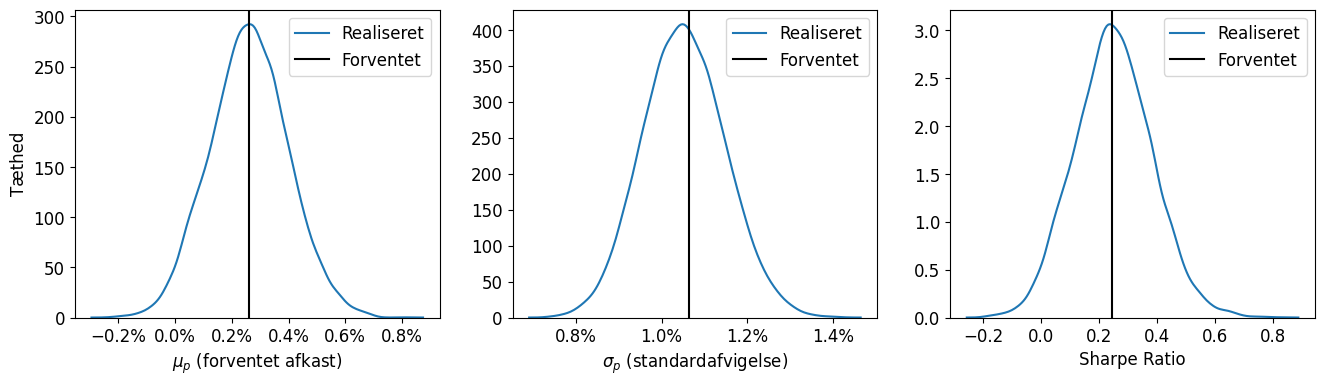

In [18]:
# kde plots for realized values for optimal long-only  portfolio

fig, ax = plt.subplots(1,3,figsize=(16,4), sharex='col', sharey='col')

# expected return
sns.kdeplot(mu_opt_realized, label="Realiseret", ax=ax[0])
ax[0].axvline(mu_opt, ymin=0, ymax=1, color="black", label='Forventet')
ax[0].legend()

# std.
sns.kdeplot(std_opt_realized, label="Realiseret", ax=ax[1])
ax[1].axvline(std_opt, ymin=0, ymax=1, color="black", label='Forventet')
ax[1].legend()

# Sharpe Ratio
sns.kdeplot(sr_opt_realized, label="Realiseret", ax=ax[2])
ax[2].axvline(sr_opt, ymin=0, ymax=1, color="black", label='Forventet')
ax[2].legend()

# labels and ticks
ax[0].set_ylabel("Tæthed")
ax[1].set_ylabel("")
ax[2].set_ylabel("")
ax[0].set_xlabel("$\mu_p$ (forventet afkast)")
ax[1].set_xlabel("$\sigma_p$ (standardafvigelse)")
ax[2].set_xlabel("Sharpe Ratio")
ticks = ticker.PercentFormatter(1, decimals=1)
ax[0].xaxis.set_major_formatter(ticks)
ax[1].xaxis.set_major_formatter(ticks)

#plt.savefig("true_optimal_kdplots.jpg",bbox_inches="tight",dpi=300)
plt.show()

# Plot results in graphs with true efficient frontier

In [19]:
# calculate true minimum variance portfolio

w_min_var = calculate_min_var_portfolio(cov_mat)

In [20]:
mu_min_var = portfolio_mean(w_min_var, mu)
std_min_var = portfolio_std(w_min_var, cov_mat)

# efficient portfolios
alpha = np.linspace(-5.0, 1.0, 1000)

w_eff = w_min_var[:, None] * alpha[None, :] + w_opt[:, None] * (1-alpha[None, :])

std_eff = np.apply_along_axis(portfolio_std, 0, w_eff, cov_mat)
mu_eff = np.apply_along_axis(portfolio_mean, 0, w_eff, mu)

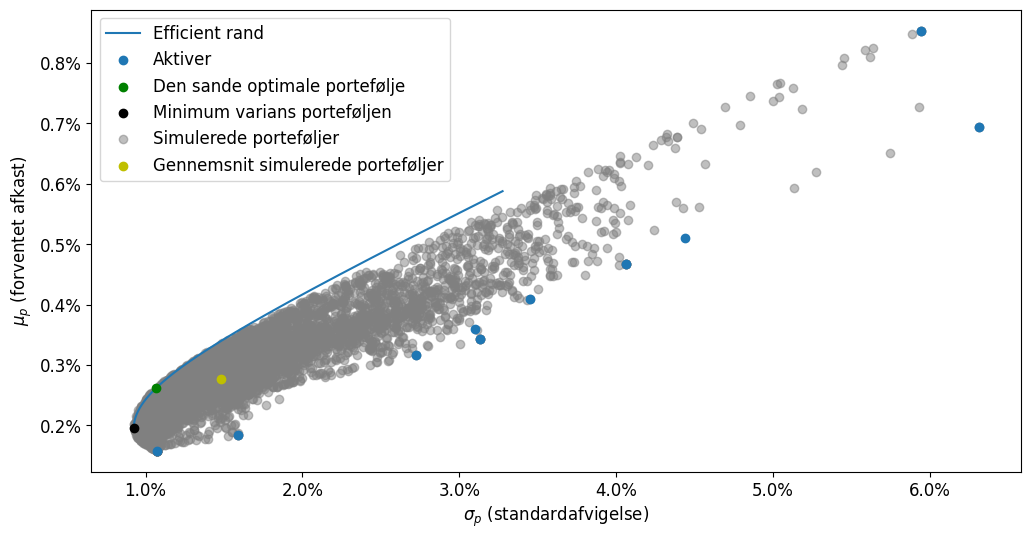

In [21]:
"""
Plot the efficient frontier
"""
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(std_eff, mu_eff, label="Efficient rand")
ax.scatter(np.diag(vols_mat), mu, label="Aktiver", zorder=10)
ax.scatter(std_opt, mu_opt, label="Den sande optimale portefølje", color="green", zorder=10)
ax.scatter(std_min_var, mu_min_var, color="black", label="Minimum varians porteføljen", zorder=10)
ax.scatter(std_sim, mu_sim, color="grey", label="Simulerede porteføljer", alpha=0.5)
ax.scatter(av_std_sim, av_mu_sim, color='y', label="Gennemsnit simulerede porteføljer", zorder=10)

ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax.set_xlabel("$\sigma_p$ (standardafvigelse)")
ax.set_ylabel("$\mu_p$ (forventet afkast)")

ax.legend()
#plt.savefig("simulated portfolios with efficient frontier.jpg",bbox_inches="tight",dpi=300)
plt.show()

In [22]:
w_min_var_ls = minimum_variance_portfolio(cov_mat)
mu_min_var_ls = portfolio_mean(w_min_var_ls, mu)
std_min_var_ls = portfolio_std(w_min_var_ls, cov_mat)

# efficient portfolios
alpha = np.linspace(-5.0, 1.0, 1000)

w_eff = w_min_var_ls[:, None] * alpha[None, :] + w_opt_ls[:, None] * (1-alpha[None, :])

std_eff = np.apply_along_axis(portfolio_std, 0, w_eff, cov_mat)
mu_eff = np.apply_along_axis(portfolio_mean, 0, w_eff, mu)

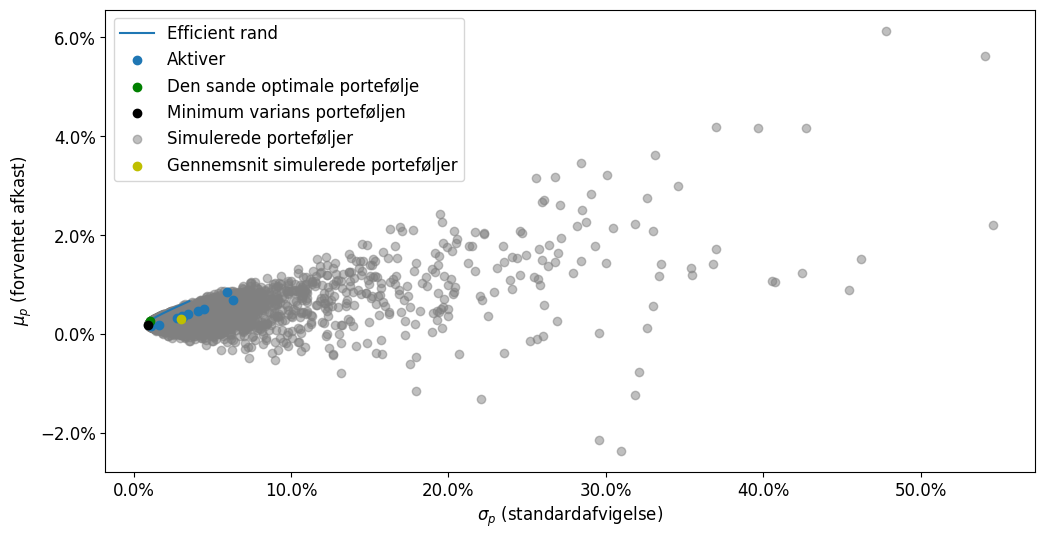

In [23]:
"""
Plot the efficient frontier
"""
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(std_eff, mu_eff, label="Efficient rand")
ax.scatter(np.diag(vols_mat), mu, label="Aktiver", zorder=10)
ax.scatter(std_opt_ls, mu_opt_ls, label="Den sande optimale portefølje", color="green", zorder=10)
ax.scatter(std_min_var_ls, mu_min_var_ls, color="black", label="Minimum varians porteføljen", zorder=10)
ax.scatter(std_sim_ls, mu_sim_ls, color="grey", label="Simulerede porteføljer", alpha=0.5)
ax.scatter(av_std_sim_ls, av_mu_sim_ls, color='y', label="Gennemsnit simulerede porteføljer", zorder=10)

ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax.set_xlabel("$\sigma_p$ (standardafvigelse)")
ax.set_ylabel("$\mu_p$ (forventet afkast)")

ax.legend()
#plt.savefig("simulated portfolios with efficient frontier_ls.jpg",bbox_inches="tight",dpi=300)
plt.show()

# PC portfolios analysis (long-short mean-variance)

In [24]:
# Correlation PCA
num_sim = len(mu_est)

# true parameters
vols_mat = np.diag(np.sqrt(np.diag(cov_mat)))
corr_mat = cov_to_corr_matrix(cov_mat)
P, L = eig_decomp(corr_mat)
mu_p, std_p = calculate_mu_and_vols_pc(mu, cov_mat)
sr_p = mu_p / std_p

# calculate factor weights and var cont. for true optimal
x_p = P.T @ vols_mat @ w_opt_ls
var_contributions_opt = calculate_pc_var_contributions(x_p, L)

# initiate variables for simulated data
mu_p_sim = np.zeros((num_sim, num_assets))
std_p_sim = np.zeros((num_sim, num_assets))

# initiate variables for simulated portfolios
x_p_sim = np.zeros((num_sim, num_assets))
var_contributions_sim = np.zeros((num_sim, num_assets))

for k in range(num_sim):
    mu_p_sim[k,:], std_p_sim[k,:] = calculate_mu_and_vols_pc(mu_est[k],cov_mat_est[k])
    x_p_sim[k,:] = P.T @ vols_mat @ w_sim_ls[k,:]
    var_contributions_sim[k,:] = calculate_pc_var_contributions(x_p_sim[k,:], L)

In [173]:
#a2l.to_ltx(P.T,frmt='{:6.3f}', arraytype='bmatrix', print_out=True)

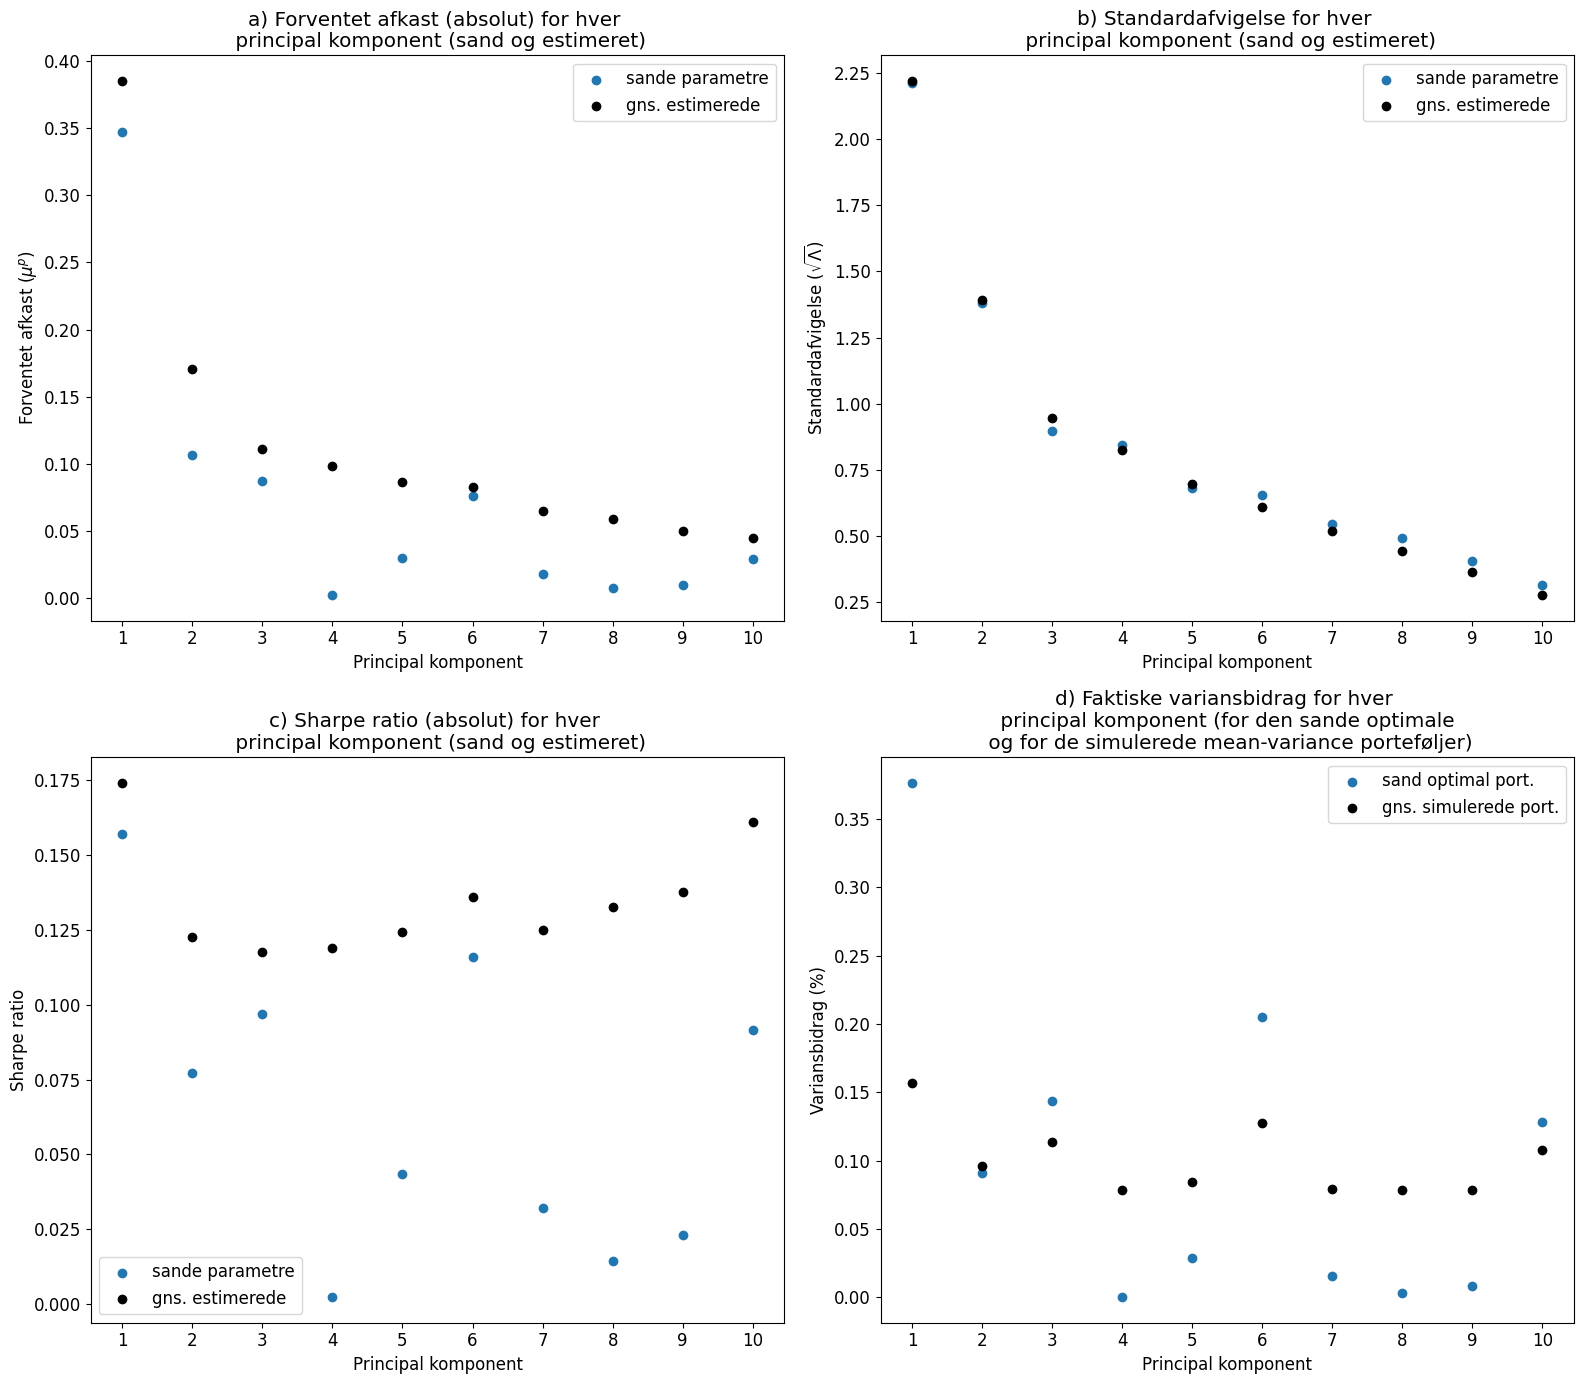

In [25]:
principal_components = np.linspace(1,num_assets,num_assets)

fig, ax = plt.subplots(2, 2,figsize=(16,14))

ax[0,0].set_title('a) Forventet afkast (absolut) for hver \n principal komponent (sand og estimeret)')
ax[0,0].scatter(principal_components, np.abs(mu_p), label='sande parametre')
ax[0,0].scatter(principal_components, np.mean(np.abs(mu_p_sim), axis=0), color='black', label='gns. estimerede')

ax[0,1].set_title('b) Standardafvigelse for hver \n principal komponent (sand og estimeret)')
ax[0,1].scatter(principal_components, std_p, label='sande parametre')
ax[0,1].scatter(principal_components, np.mean(std_p_sim, axis=0), color='black', label='gns. estimerede')

ax[1,0].set_title('c) Sharpe ratio (absolut) for hver \n principal komponent (sand og estimeret)')
ax[1,0].scatter(principal_components, np.abs(mu_p/std_p), label='sande parametre')
ax[1,0].scatter(principal_components, np.mean(np.abs(mu_p_sim/std_p_sim), axis=0), color='black', label='gns. estimerede')

ax[1,1].set_title('d) Faktiske variansbidrag for hver \n principal komponent (for den sande optimale \n og for de simulerede mean-variance porteføljer)')
ax[1,1].scatter(principal_components[:], var_contributions_opt, label='sand optimal port.')
ax[1,1].scatter(principal_components[:], np.mean(var_contributions_sim, axis=0),color='black', label='gns. simulerede port.')


ax[0,0].set_ylabel("Forventet afkast ($\mu^p$)")
ax[0,1].set_ylabel('Standardafvigelse ($\sqrt{\Lambda}$)')
ax[1,0].set_ylabel('Sharpe ratio')
ax[1,1].set_ylabel('Variansbidrag (%)')

for axe in ax.flat:
    axe.set(xticks = principal_components)
    axe.legend()
    axe.set_xlabel("Principal komponent")

fig.tight_layout()

#plt.savefig("Results_for_PC_ls.jpg",bbox_inches="tight",dpi=300)
plt.show()

# Var cont. for long-short min-var port. (true optimal and simulated)

In [26]:
# calculate factorweights, var cont. and ENB for true long-short min_var port
x_p_min_var = P.T @ vols_mat @ w_min_var_ls
var_contributions_min_var = calculate_pc_var_contributions(x_p_min_var, L)

# initiate variables for simulated portfolios
x_p_min_var_sim = np.zeros((num_sim, num_assets))
var_contributions_min_var_sim = np.zeros((num_sim, num_assets))

for k in range(num_sim):
    x_p_min_var_sim[k,:] = P.T @ vols_mat @ min_var_sim_ls[k,:]
    var_contributions_min_var_sim[k,:] = calculate_pc_var_contributions(x_p_min_var_sim[k,:], L)

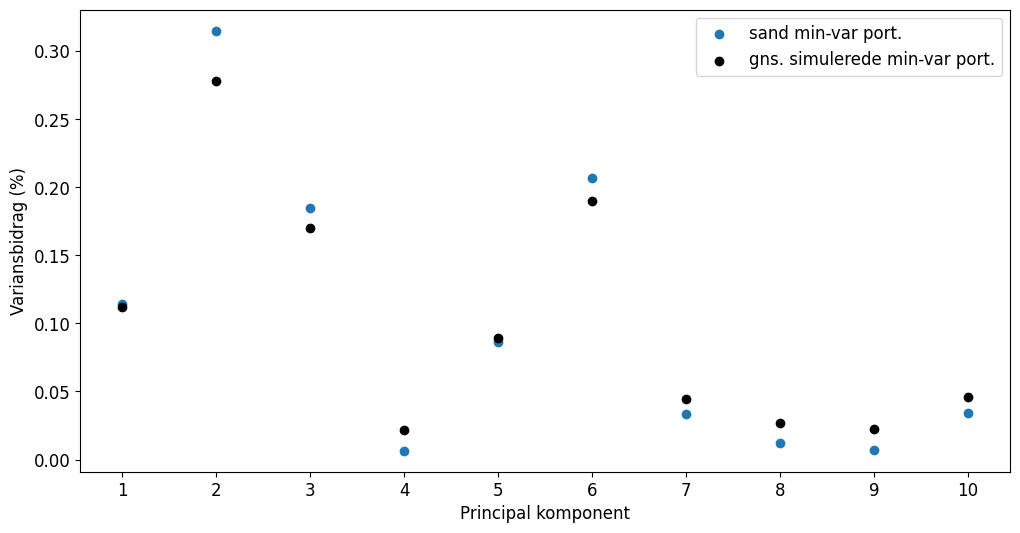

In [27]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(principal_components[:], var_contributions_min_var, label='sand min-var port.')
ax.scatter(principal_components[:], np.mean(var_contributions_min_var_sim, axis=0), color='black', label='gns. simulerede min-var port.')

ax.set(xticks = principal_components)
ax.set_ylabel("Variansbidrag (%)")
ax.set_xlabel("Principal komponent")

ax.legend()

#plt.savefig("var_cont_PC_min_var_ls.jpg",bbox_inches="tight",dpi=300)
plt.show()

# Var cont. for long-only mean-variance (true optimal and simulated)

In [28]:
# calculate factorweights, var cont. and ENB for true long-short min_var port
x_p_lo = P.T @ vols_mat @ w_opt
var_contributions_opt_lo = calculate_pc_var_contributions(x_p_lo, L)

# initiate variables for simulated portfolios
x_p_sim_lo = np.zeros((num_sim, num_assets))
var_contributions_sim_lo = np.zeros((num_sim, num_assets))

for k in range(num_sim):
    x_p_sim_lo[k,:] = P.T @ vols_mat @ w_sim[k,:]
    var_contributions_sim_lo[k,:] = calculate_pc_var_contributions(x_p_sim_lo[k,:], L)

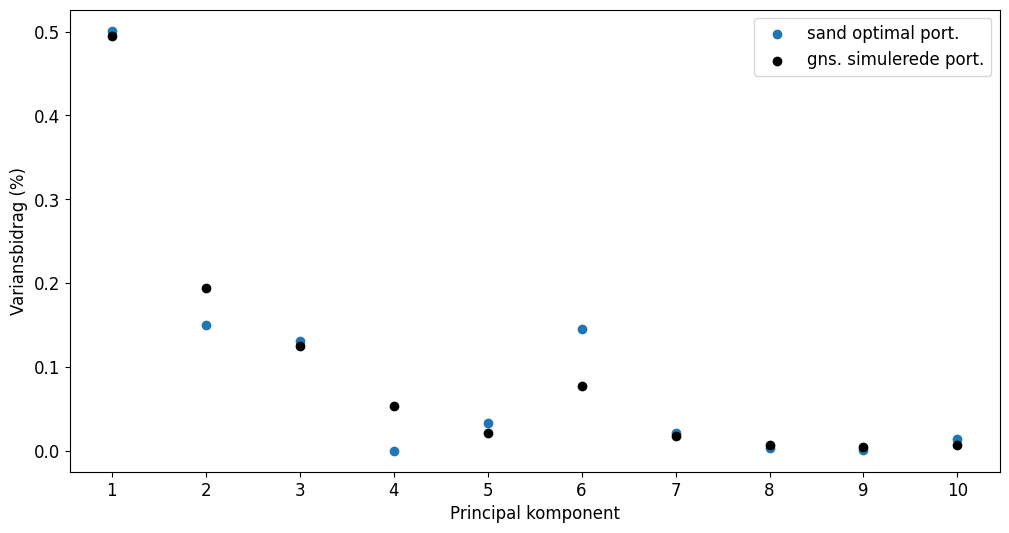

In [29]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(principal_components[:], var_contributions_opt_lo, label='sand optimal port.')
ax.scatter(principal_components[:], np.mean(var_contributions_sim_lo, axis=0), color='black', label='gns. simulerede port.')

ax.set(xticks = principal_components)
ax.set_ylabel("Variansbidrag (%)")
ax.set_xlabel("Principal komponent")

ax.legend()

#plt.savefig("var_cont_PC_lo.jpg",bbox_inches="tight",dpi=300)
plt.show()